In [63]:
import pandas as pd

data = pd.read_csv("/home/leong/Desktop/US Treasury/DGS10.csv")
data

,DATE,DGS10
0,2018-12-27,2.77
1,2018-12-28,2.72
2,2018-12-31,2.69
3,2019-01-01,.
4,2019-01-02,2.66
...,...,...
1300,2023-12-21,3.89
1301,2023-12-22,3.90
1302,2023-12-25,.
1303,2023-12-26,3.89


In [64]:
data['DGS10'] = pd.to_numeric(data['DGS10'], errors='coerce')


In [65]:
# Calculate average market yield
average_yield = data['DGS10'].mean()
print("Average market yield:", average_yield)

Average market yield: 2.2736421725239615


user story 1) Economic Analysis:
User Story: As an analyst, I want to plot the historical market yields on 10-year U.S. Treasury bonds to visualize trends and correlations with economic indicators.

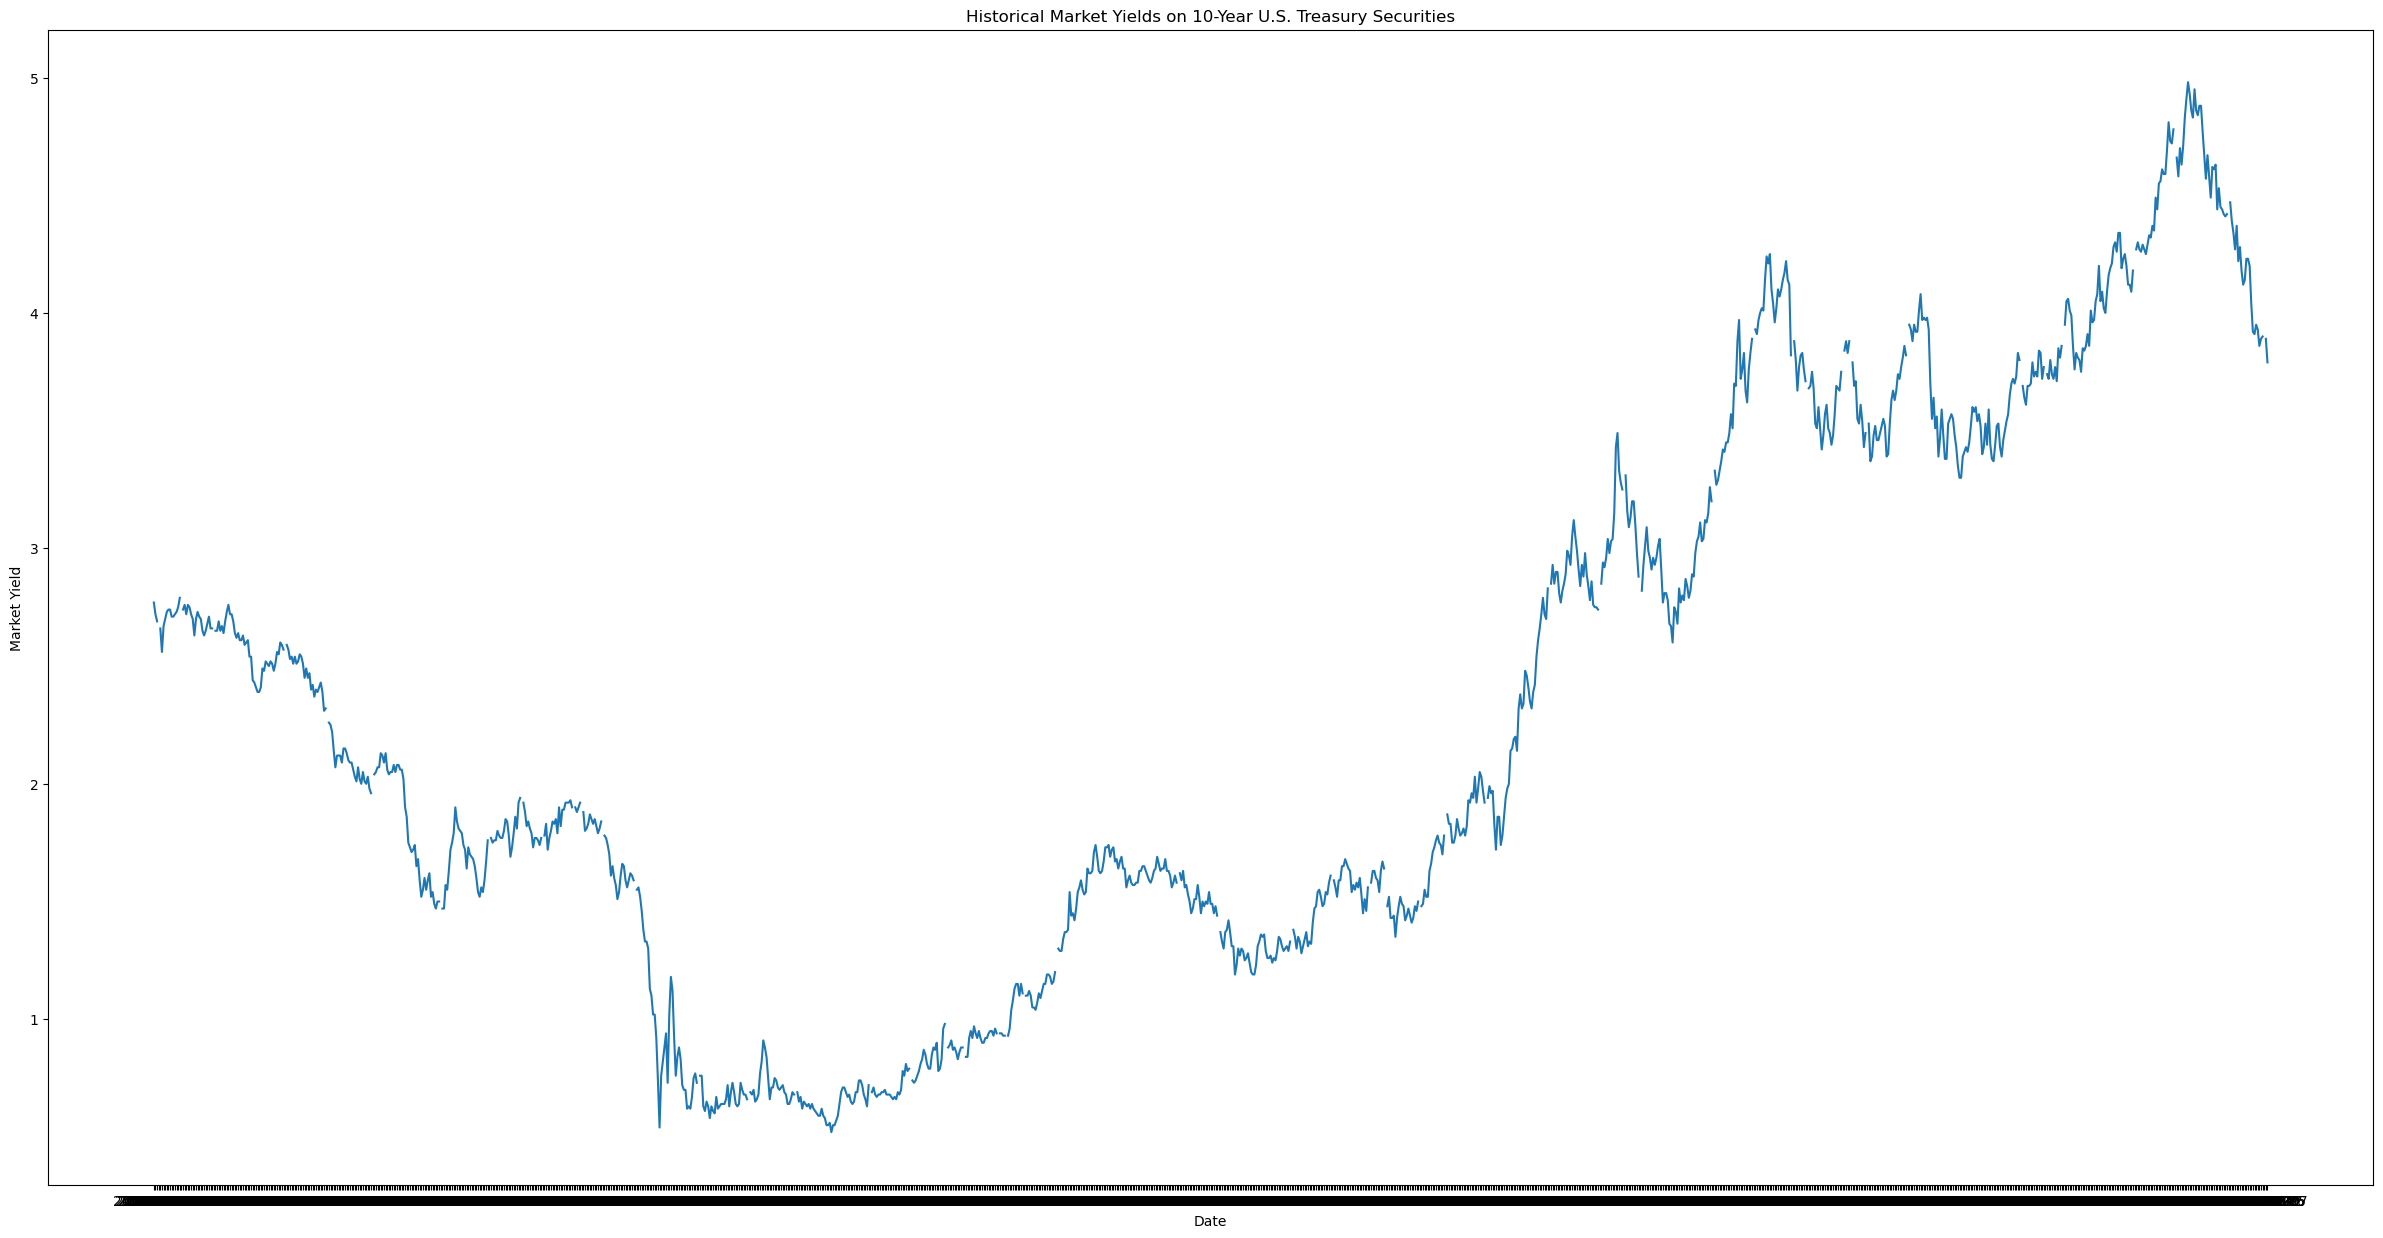

In [66]:
# Plotting the historical market yields
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
plt.plot(data['DATE'], data['DGS10'])
plt.xlabel('Date')
plt.ylabel('Market Yield')
plt.title('Historical Market Yields on 10-Year U.S. Treasury Securities')
plt.show()

Forecasting and Modeling:
User Story: As a researcher, I want to fit a time series forecasting model to the historical market yields data of 10-year U.S. Treasury bonds to generate predictions for future market yields.

In [67]:
# Fit a time series forecasting model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['DGS10'], order=(1, 1, 1))
model_fit = model.fit()

# Generate future yield predictions
future_predictions = model_fit.forecast(steps=5)
print("Future yield predictions:", future_predictions)

/home/leong/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/leong/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Future yield predictions: 1305    3.791565
1306    3.791553
1307    3.791553
1308    3.791553
1309    3.791553
Name: predicted_mean, dtype: float64


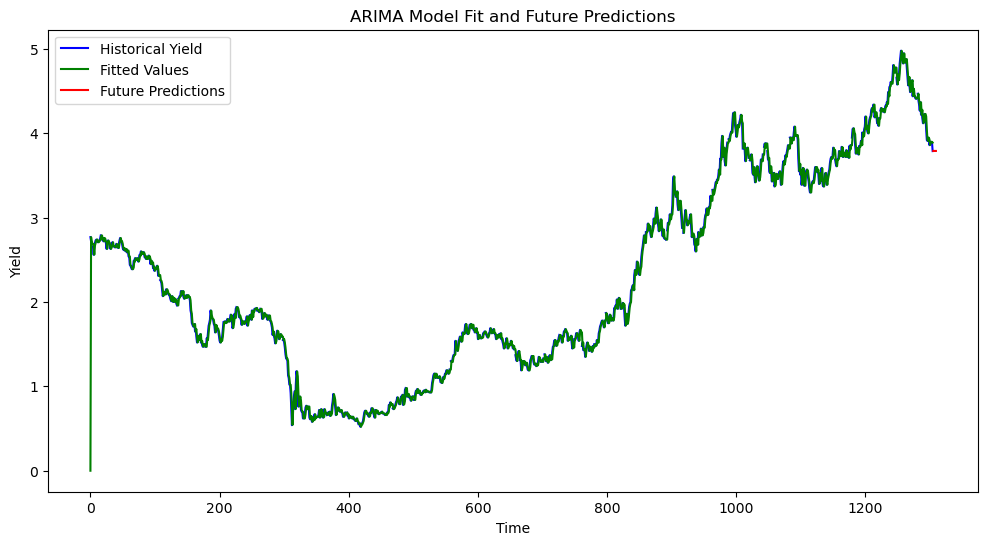

In [68]:
# Visualize the model fit and predictions
plt.figure(figsize=(12, 6))

# Plot the historical data
plt.plot(data['DGS10'], label='Historical Yield', color='blue')

# Plot the fitted values
plt.plot(model_fit.fittedvalues, label='Fitted Values', color='green')

# Plot the future yield predictions
plt.plot(range(len(data['DGS10']), len(data['DGS10']) + len(future_predictions)), future_predictions, label='Future Predictions', color='red')

plt.title('ARIMA Model Fit and Future Predictions')
plt.xlabel('Time')
plt.ylabel('Yield')
plt.legend()
plt.show()


In [69]:
import numpy as np
# Evaluate the model performance on the training data
train_predictions = model_fit.predict()
rmse = np.sqrt(((train_predictions - data['DGS10'][1:]) ** 2).mean())
print("Root Mean Squared Error (RMSE) on training data:", rmse)


Root Mean Squared Error (RMSE) on training data: 0.060689199271530485


In [70]:
# Generate additional future yield predictions
additional_predictions = model_fit.forecast(steps=10)
print("Additional future yield predictions:", additional_predictions)


Additional future yield predictions: 1305    3.791565
1306    3.791553
1307    3.791553
1308    3.791553
1309    3.791553
1310    3.791553
1311    3.791553
1312    3.791553
1313    3.791553
1314    3.791553
Name: predicted_mean, dtype: float64


In [71]:
data['DGS10'] = pd.to_numeric(data['DGS10'], errors='coerce')
